## Clasificación de elementos de notación musical
Podemos definir la notación musical como un sistema gráfico de representar el sonido en todos sus grados musicales, las modificaciones de tiempo, intensidad, articulación y matices que le afectan así como las pautas rítmicas y silencios que limitan su intervención.

### Proyecto Redes Neuronales
El proyecto consiste en obtener distintas imágenes de diversas fuentes para entrenar un modelo predictivo que clasifique imágenes según el símbolo de la notación musical que representan.

### ¿Para qué puede usarse?
En el mercado existen muy pocos, por no decir uno o dos, software de transcripción de partituras hechas a mano para el ordenador. Con un modelo de precisión alta, podría intentarse desarrollar dicho software.

![image.png](https://apacha.github.io/OMR-Datasets/samples/universal-music-symbol-collection.png)

### Fuente de obtención de datos
https://apacha.github.io/OMR-Datasets/

# Proyecto Musical CNN

In [1]:
# Importación de las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import tensorflow as tf
import keras
from keras.utils import plot_model
from time import time
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

Using TensorFlow backend.


## Lectura de archivos csv

In [2]:
all_files = glob.glob("*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, sep=',', error_bad_lines=False, header=None)
    li.append(df)

# Transformando nombre de la última columna 
frame = pd.concat(li, axis=0, ignore_index=True)
frame.rename(columns={ df.columns[576]: "Clase" }, inplace = True)

## Viendo las categorías más populares
Dentro del dataset se encuentran 79 símbolos. Se hizo primero un filtro a nivel de imágenes, antes de realizar los CSV, pero para fines de no sobrecargar la NN, se usarán los primeros 11.

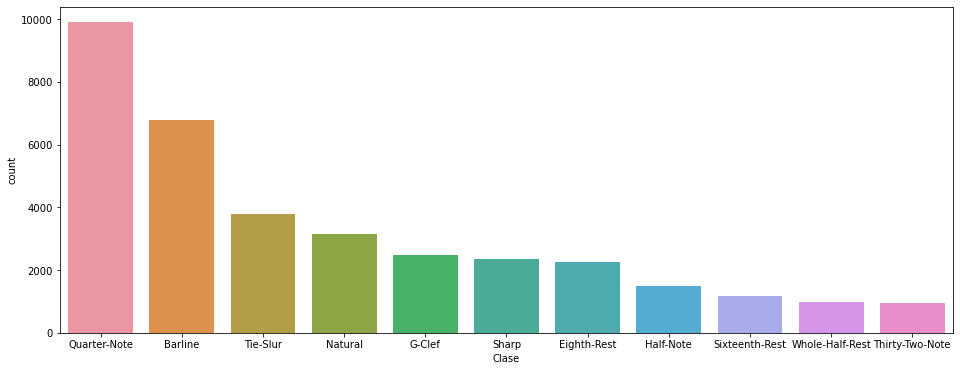

In [3]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="Clase", data=frame, order=frame.Clase.value_counts().iloc[:11].index)

In [4]:
filtro = frame.Clase.value_counts().iloc[:11].index.tolist()
filtro

['Quarter-Note',
 'Barline',
 'Tie-Slur',
 'Natural',
 'G-Clef',
 'Sharp',
 'Eighth-Rest',
 'Half-Note',
 'Sixteenth-Rest',
 'Whole-Half-Rest',
 'Thirty-Two-Note']

In [5]:
datos = frame[frame['Clase'].isin(filtro)]
datos.head(10)

,0,1,2,3,4,5,6,7,8,9,...,567,568,569,570,571,572,573,574,575,Clase
1061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline
1062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline
1063,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline
1064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline
1065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline
1066,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline
1067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline
1068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline
1069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline
1070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barline


In [6]:
datos = datos.to_numpy()
datos

array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Barline'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Barline'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Barline'],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Whole-Half-Rest'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Whole-Half-Rest'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Whole-Half-Rest']], dtype=object)

#### Mostrando un objeto
Se graficará un objeto de ejemplo. Todas las imágenes están a blanco y negro.

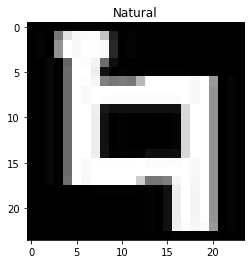

In [7]:
plt.imshow(np.resize(datos[15032][0:575].astype(float),(24,24)), cmap="gray")
plt.title(datos[15032][576])
plt.show()

In [8]:
# Convirtiendo los datos a float
datos[::, 0::575] = datos[::,0::575].astype(float)

#### Codificando las categorías
Se codificarán las categorías de texto a número para el modelo predictivo.

In [9]:
# Label encoder para las categorías
le = preprocessing.LabelEncoder()
le.fit(datos[::,576])
le.classes_

array(['Barline', 'Eighth-Rest', 'G-Clef', 'Half-Note', 'Natural',
       'Quarter-Note', 'Sharp', 'Sixteenth-Rest', 'Thirty-Two-Note',
       'Tie-Slur', 'Whole-Half-Rest'], dtype=object)

In [10]:
# Transformando los datos a forma numérica
datos[::,576] = le.transform(datos[::,576])

In [11]:
# Convirtiendo los datos a flotante
datos.astype(float)

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 10.],
       [ 0.,  0.,  0., ...,  0.,  0., 10.],
       [ 0.,  0.,  0., ...,  0.,  0., 10.]])

### Partiendo el modelo en parte de entrenamiento y validación

In [12]:
from sklearn.model_selection import train_test_split
# Haciendo el splitting entre training set y test set
train, test = train_test_split(datos, test_size=0.30) # Usé la librería de sklearn para hacerlo de manera más simple

In [13]:
# Segmentando el dataset en X y Y
x_train = train[::,:576].astype(float)
y_train = train[::, 576].astype(float)
x_test = train[::,:576].astype(float)
y_test = train[::, 576].astype(float)

# Re-escalando las imágenes
x_train = x_train / 255
x_test = x_test / 255

##### El tamaño no tiene las dimensiones para CNN

In [14]:
# Tamaño del input antes de prepararlo
x_train[100].shape

(576,)

In [15]:
# Preparándolo con tamaño (24, 24, 1)
x_train = x_train.reshape(x_train.shape[0], 24, 24, 1)

In [16]:
# Tamaño del input
x_train[100].shape

(24, 24, 1)

## Modelo Predictivo
Se usará Keras para construir la CNN. Tendrá dos capas convolucionales y dos capas de neuronas.

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
cnn_model = Sequential(name='Simple CNN')

#convlolutional layers
cnn_model.add(Conv2D(24, kernel_size=(3, 3), activation='relu', input_shape=(24, 24, 1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(48, kernel_size=(3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# dense layers
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dense(11, activation='softmax'))

# Compile the model
cnn_model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(cnn_model.summary())

Model: "Simple CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 24)        240       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 24)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 24)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 48)          10416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 48)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               3

In [19]:
hitorial_del_modelo = cnn_model.fit(x_train, y_train,
                          batch_size = 128,
                          epochs = 20,
                          validation_split = 0.2,
                          shuffle=True, verbose=1)

Train on 19758 samples, validate on 4940 samples
Epoch 1/20
19758/19758 [==============================] - 20s 1ms/step - loss: 1.8632 - accuracy: 0.4106 - val_loss: 1.4591 - val_accuracy: 0.5437
Epoch 2/20
19758/19758 [==============================] - 14s 702us/step - loss: 1.1727 - accuracy: 0.6397 - val_loss: 0.9277 - val_accuracy: 0.7354
Epoch 3/20
19758/19758 [==============================] - 13s 649us/step - loss: 0.8708 - accuracy: 0.7261 - val_loss: 0.7553 - val_accuracy: 0.7557
Epoch 4/20
19758/19758 [==============================] - 14s 720us/step - loss: 0.7212 - accuracy: 0.7709 - val_loss: 0.6046 - val_accuracy: 0.8032
Epoch 5/20
19758/19758 [==============================] - 13s 665us/step - loss: 0.6388 - accuracy: 0.7983 - val_loss: 0.5622 - val_accuracy: 0.8253
Epoch 6/20
19758/19758 [==============================] - 13s 662us/step - loss: 0.5541 - accuracy: 0.8270 - val_loss: 0.4863 - val_accuracy: 0.8486
Epoch 7/20
19758/19758 [==============================] - 1

# Obteniendo los resultados del modelo durante el entrenamiento
Ver el desempeño del modelo durante el entrenamiento.

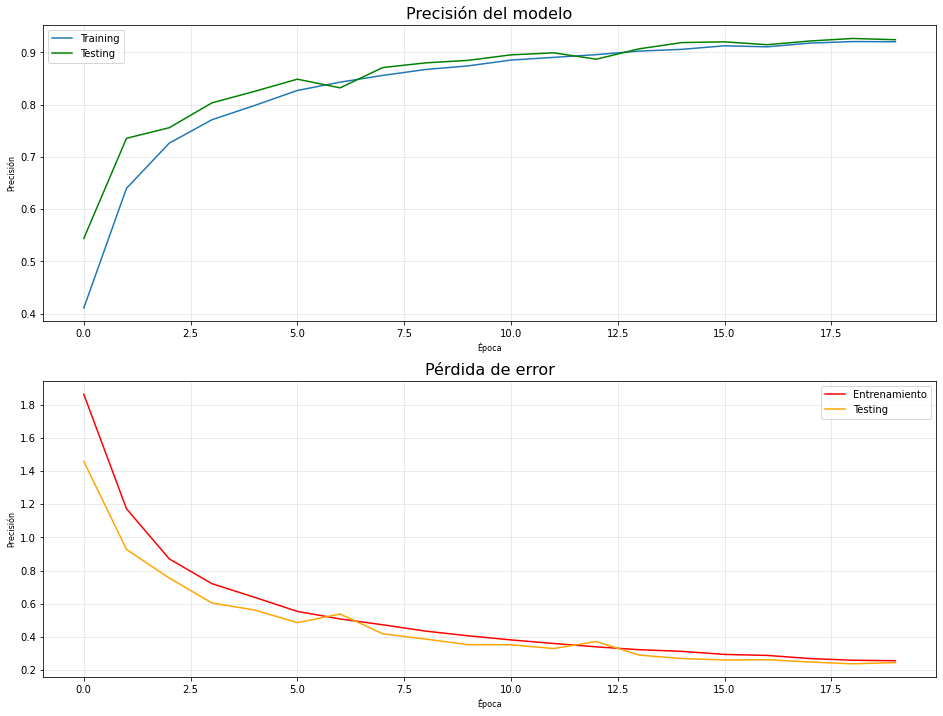

In [20]:
def plot_hist(model_history):
    fix,axs=plt.subplots(2,1,figsize=(16,12))
    ax1 = axs[0]
    ax1.plot(model_history.history['accuracy'])
    ax1.plot(model_history.history['val_accuracy'],c='g')
    ax1.set_title('Precisión del modelo',fontsize=16)
    ax1.set_ylabel('Precisión',fontsize=8)
    ax1.set_xlabel('Época',fontsize=8)
    ax1.grid(alpha=0.3)
    ax1.legend(['Training', 'Testing'], loc='upper left')


    # # summarize history for loss
    ax2 = axs[1]
    ax2.plot(model_history.history['loss'],c='r')
    ax2.plot(model_history.history['val_loss'],c='orange')
    ax2.set_title('Pérdida de error',fontsize=16)
    ax2.set_ylabel('Precisión',fontsize=8)
    ax2.set_xlabel('Época',fontsize=8)
    ax2.grid(alpha=0.3)
    ax2.legend(['Entrenamiento', 'Testing'], loc='upper right')
    plt.show()


plot_hist(hitorial_del_modelo)

### Probando el modelo

In [21]:
# Preparándolo con tamaño (24, 24, 1)
x_test = x_test.reshape(x_test.shape[0], 24, 24, 1)

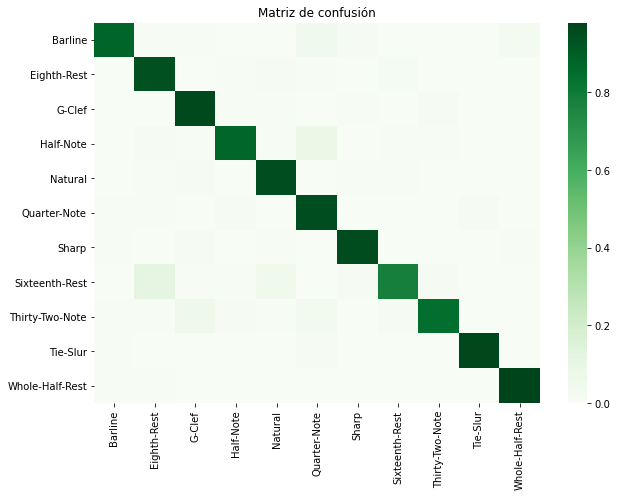

In [192]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

## Predice los datos
y_pred = cnn_model.predict(x_test).argmax(axis=-1)

cm = confusion_matrix(y_test, y_pred).astype(float)

# Normalizamos la CM para que aparezcan los datos de manera relativa a las filas.
for i in range(len(cm)):
    cm[i] = cm[i].astype(float)
    cm[i] = cm[i].astype(float) / np.sum(cm[i]).astype(float)

# Plotear la imagen
df_cm = pd.DataFrame(cm, index = [i for i in le.classes_],
                  columns = [i for i in le.classes_])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=False, cmap="Greens").set_title("Matriz de confusión")

plt.show()

In [23]:
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)

print('\nTest accuracy:', test_acc)
print('Test loss:    ', test_loss)

24698/24698 [==============================] - 5s 194us/step

Test accuracy: 0.9281723499298096
Test loss:     0.2375270890479088


### Graficando el modelo

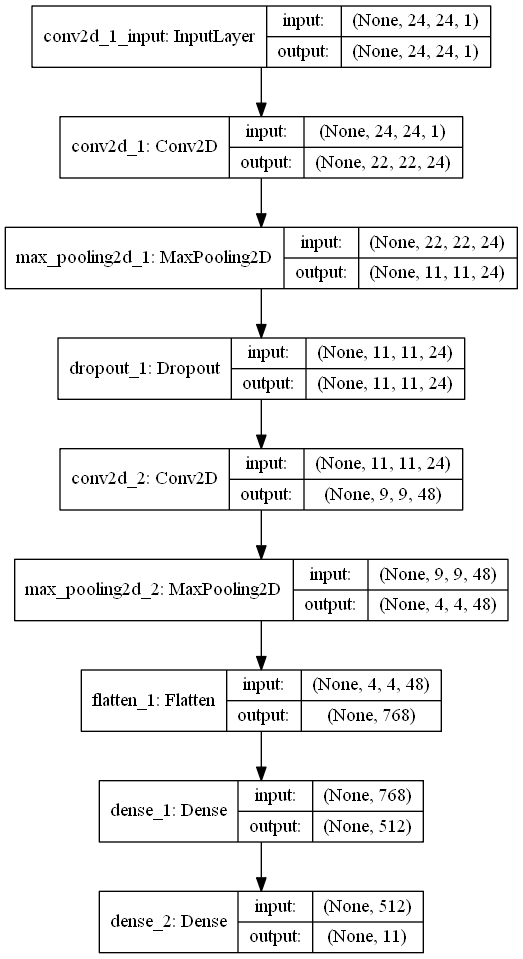

In [24]:
plot_model(cnn_model, to_file='model.png', show_shapes=True, show_layer_names=True)

## Undersampling para eliminar el desbalance entre categorías
Debido al desbalance entre categorías mostrado en la primera gráfica de barras se decidió aplicar Undersampling para ver si el modelo mejora aún más.

In [201]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
# Desnormalizar
x_train = x_train.reshape(x_train.shape[0], 576)

## UNDERSAMPLING
X_undersampled, y_undersampled = rus.fit_resample(x_train, y_train)

# Normalizar
x_train = x_train.reshape(x_train.shape[0], 24, 24, 1)
X_undersampled = X_undersampled.reshape(X_undersampled.shape[0], 24, 24, 1)

In [194]:
cnn_model_Under = Sequential(name='Simple CNN')

#convlolutional layers
cnn_model_Under.add(Conv2D(24, kernel_size=(3, 3), activation='relu', input_shape=(24, 24, 1)))
cnn_model_Under.add(MaxPooling2D(pool_size=(2,2)))
cnn_model_Under.add(Dropout(0.25))

cnn_model_Under.add(Conv2D(48, kernel_size=(3, 3), activation='relu'))
cnn_model_Under.add(MaxPooling2D(pool_size=(2,2)))

# dense layers
cnn_model_Under.add(Flatten())
cnn_model_Under.add(Dense(512, activation='relu'))
cnn_model_Under.add(Dense(11, activation='softmax'))

# Compile the model
cnn_model_Under.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [202]:
historial_del_modelo_Under = cnn_model.fit(X_undersampled, y_undersampled,
                          batch_size = 128,
                          epochs = 20,
                          validation_split = 0.2,
                          shuffle=True, verbose=0) # Verbose a 0 para que no imprima el proceso

## Verificando si mejoró su precisión
La idea es comparar las métricas en _ceteris paribus_ y ver si se desenvuelve mejor con un dataset undersampleado.

In [203]:
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)

print('\nPrecisión:', test_acc)
print('Loss [Pérdida]:    ', test_loss)

24698/24698 [==============================] - 5s 184us/step

Precisión: 0.8786946535110474
Loss [Pérdida]:     0.40280183719926466


El modelo se desenvolvió mucho peor con un sistema de undersampling para su entrenamiento. 
<center> <h4> 0.87 (Precisión UNDER) < 0.92 (Precisión NORMAL) </center>

## Visualizando los _Feature maps_
Para ver qué es lo que la red neuronal está aprendiendo por cada capa.

In [25]:
# Código facilitado por Ing. Medina
conv2d_layers = [] # Array vacío donde se guardarán las capas
for i, layer in enumerate(cnn_model.layers):
    # Verifica si es capa CONVOLUCIONAL a partir de que en su nombre este la palabra conv
    if 'conv' not in layer.name:
        continue
    filters, biases = layer.get_weights() # Guarda pesos
    conv2d_layers.append(i) # Agrega a la lista
    print("{0:<20} {1}".format(layer.name, filters.shape))

conv2d_1             (3, 3, 1, 24)
conv2d_2             (3, 3, 24, 48)


In [26]:
# Extrae los pesos de las capas convolucionales
conv2d_layers_weights = []
for i in conv2d_layers:
    filters, biases = cnn_model.layers[i].get_weights() # Obtiene los pesos de la capa i
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    conv2d_layers_weights.append(filters)
    
# Se asignan a una variable cada elemento.
conv2d_1 = conv2d_layers_weights[0]
conv2d_2 = conv2d_layers_weights[1]

In [27]:
# Verificar el tamaño y forma del arreglo
conv2d_1.shape

(3, 3, 1, 24)

Graficando únicamente un filtro de acuerdo a su figura.

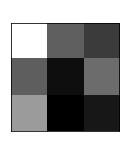

In [28]:
# plot a single filter
filter_id = 12
filter_to_plot = conv2d_1[:,:,:,filter_id]
fig, ax = plt.subplots(figsize=(2,2))
ax.set_xticks([])
ax.set_yticks([])
ax.imshow(filter_to_plot[:,:,0], cmap="gray")
ax.set_title('Filter {0}'.format(filter_id),c='w')
plt.show()

In [29]:
width, height, depth, n_filters = conv2d_1.shape #Propiedades del filtro

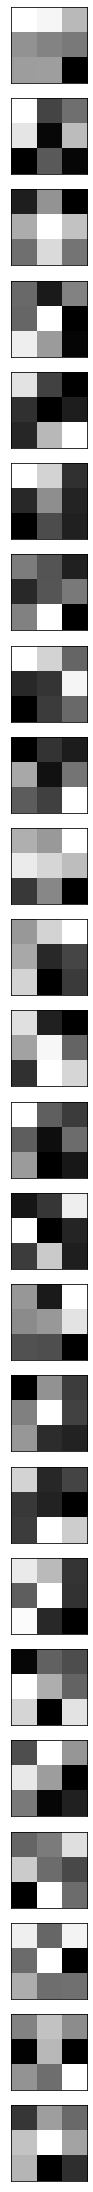

In [30]:
fig,axs=plt.subplots(n_filters, depth,figsize=(5,40))
for i in range(n_filters):
        filter_chann = conv2d_1[:,:,0,i]
        axs[i].imshow(filter_chann,cmap='gray')
        axs[i].set_xticks([])
        axs[i].set_yticks([])
plt.show()

In [31]:
width, height, depth, n_filters = conv2d_2.shape # Propiedades del filtro

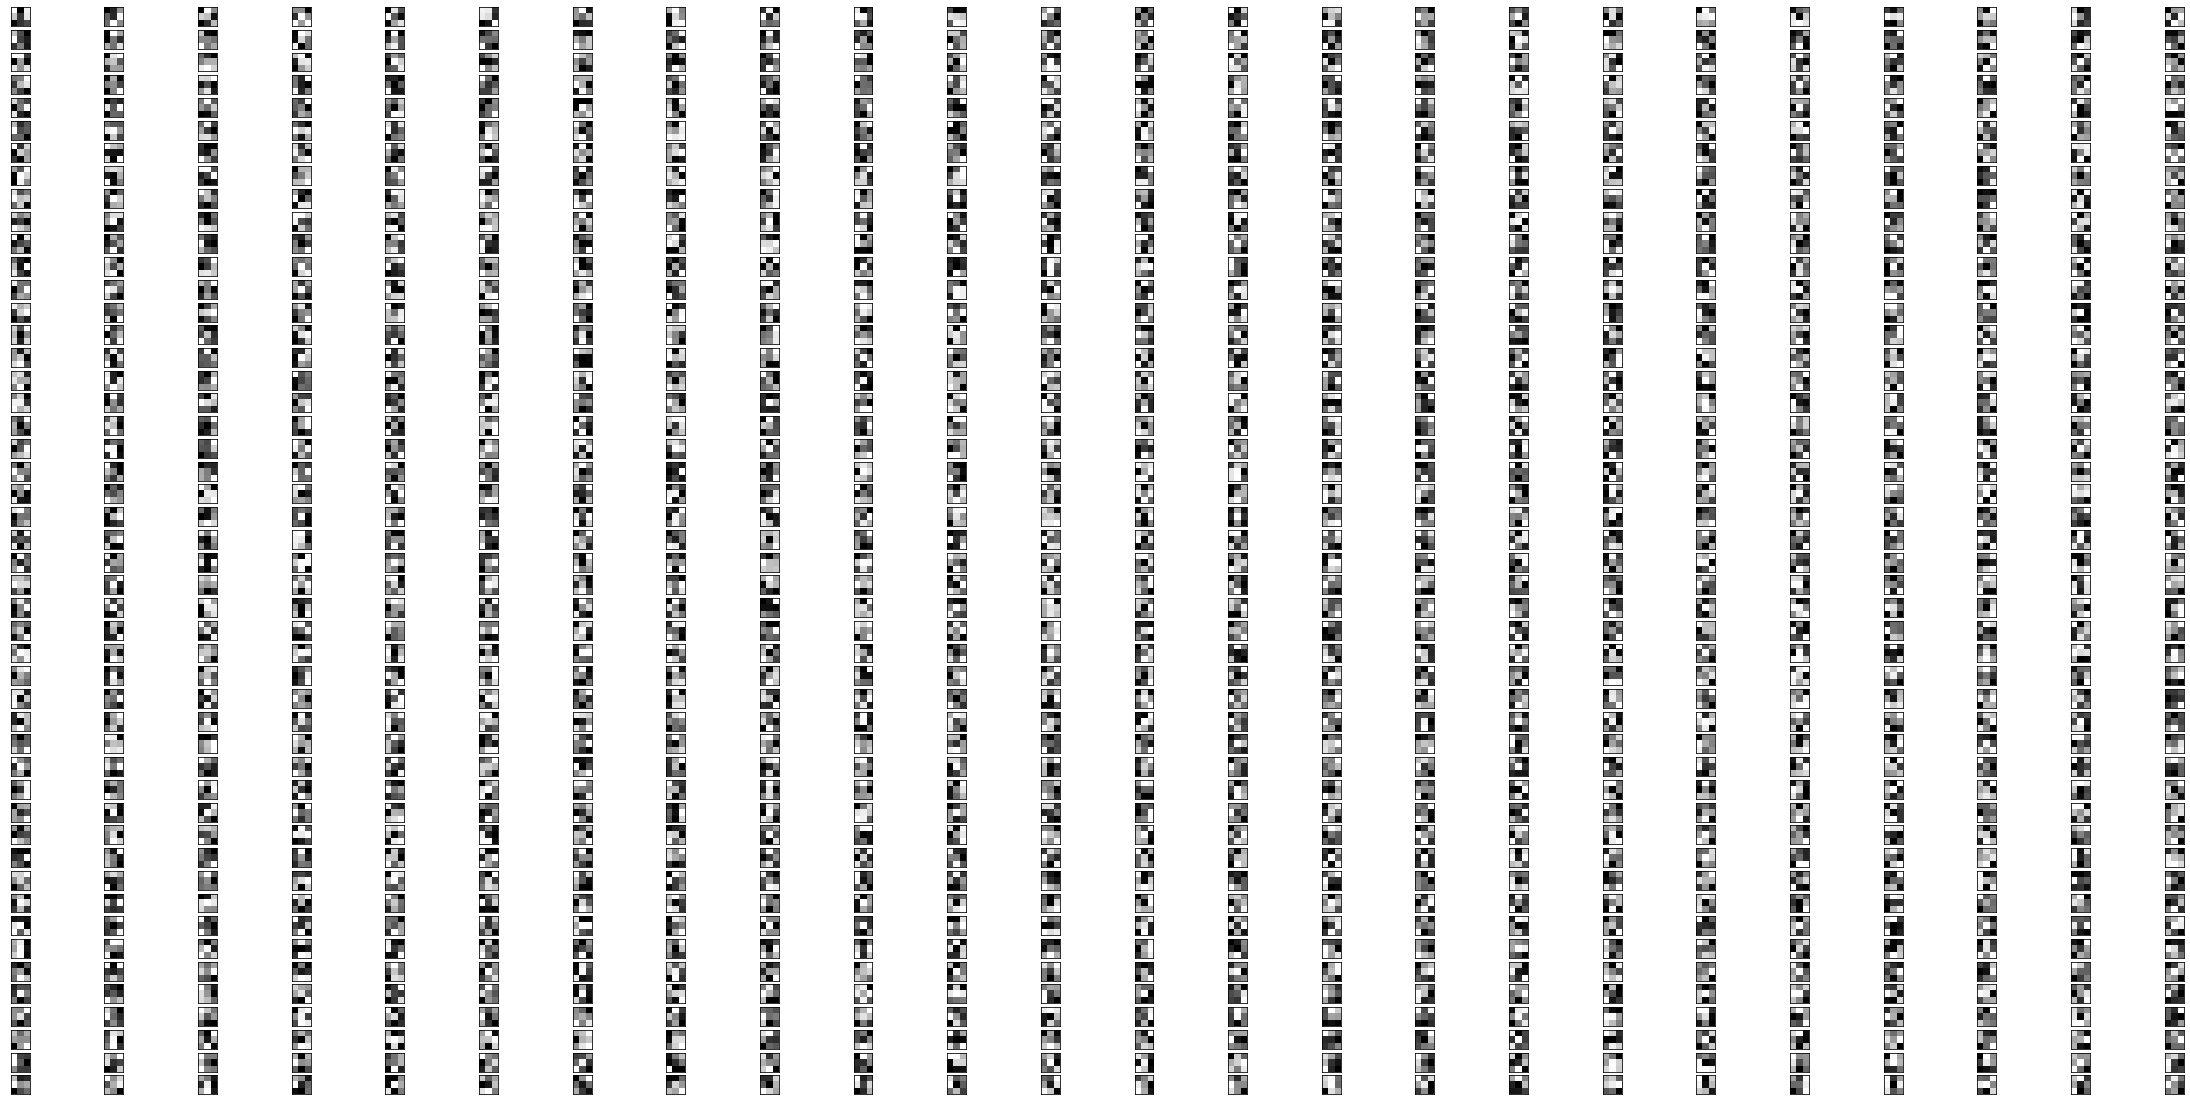

In [32]:
fig,axs=plt.subplots(n_filters, depth,figsize=(40,20))
for i in range(n_filters):
    for j in range(depth):
        filter_chann = conv2d_2[:,:,j,i]
        axs[i,j].imshow(filter_chann,cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
plt.show()

# Feature Map

Un feature map o activation map es el resultado de una convolución por un filtro.


In [72]:
# Importando la librería y creando una instancia del modelo.
layer_index = 0
from keras.models import Model

model = Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[layer_index].output)

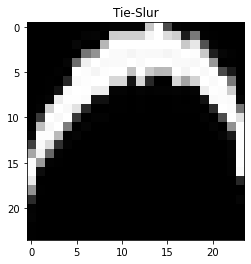

In [73]:
plt.imshow(x_train[1000][:,:,0], cmap="gray")
plt.title(le.classes_[int(y_train[1000])])
plt.show()

In [74]:
# Ver que hace para 
img = x_train[1000]
feature_map = model.predict(img.reshape(1, 24,24, 1))
print(feature_map.shape)

(1, 22, 22, 24)


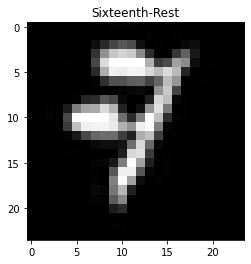

In [75]:
# IMAGEN 212
img212 = x_train[433]
feature_map212 = model.predict(img212.reshape(1, 24,24, 1))

plt.imshow(x_train[433][:,:,0], cmap="gray")
plt.title(le.classes_[int(y_train[433])])
plt.show()

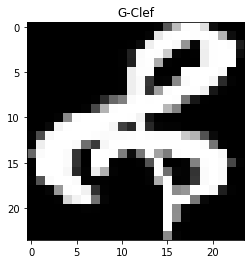

In [76]:
# IMAGEN 11072
img11071 = x_train[11071]
feature_map11071 = model.predict(img11071.reshape(1, 24,24, 1))

plt.imshow(x_train[11071][:,:,0], cmap="gray")
plt.title(le.classes_[int(y_train[11071])])
plt.show()

## Visualizando la primera capa convolucional
La primera capa corresponde a la capa 0, que contiene una imagen 22*22 porque se pierden 2 pixeles por el filtro.

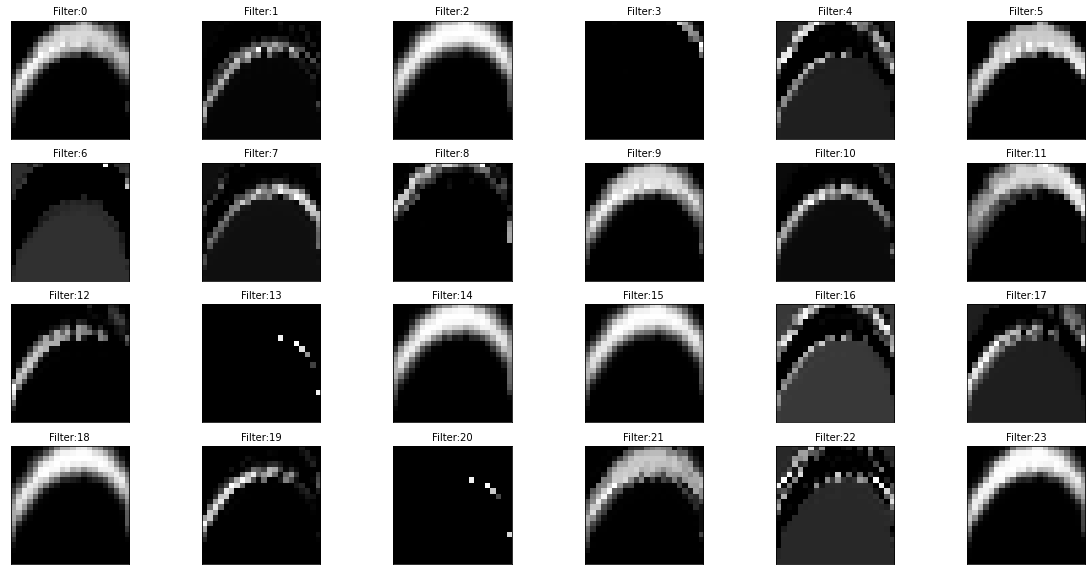

In [77]:
# Grafica una imagen por canal
_, h, w, feature_n = feature_map.shape

rows = 4
cols = 6 

fig, axs = plt.subplots(rows,cols,figsize=(20,10))
for i in range(rows):
    for j in range(cols):
        index = (i*cols)+j
        axs[i,j].set_title("Filter:{0}".format(index), c='black',fontsize=10)
        axs[i,j].imshow(feature_map[0,:,:,index], cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
plt.show()

#### Análisis del feature map
En esta capa principalmente se enfoca en los trazos curvilíneos de la prolongación de la nota. Los filtros 1 y 4 invierten la imagen, mientras que los otros la mantienen y sólo difuminan o oscurecen.

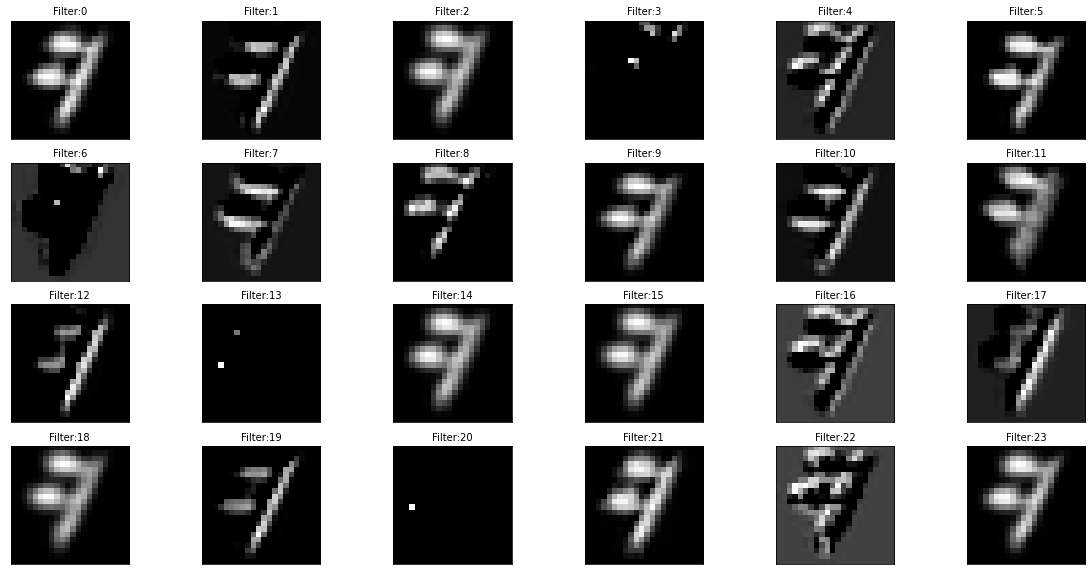

In [78]:
# Grafica una imagen por canal
_, h, w, feature_n = feature_map212.shape

rows = 4
cols = 6 

fig, axs = plt.subplots(rows,cols,figsize=(20,10))
for i in range(rows):
    for j in range(cols):
        index = (i*cols)+j
        axs[i,j].set_title("Filter:{0}".format(index), c='black',fontsize=10)
        axs[i,j].imshow(feature_map212[0,:,:,index], cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
plt.show()

#### Análisis del feature map
En esta capa principalmente se enfoca en los trazos de la plica y la cabeza. Los filtros 13 y 20 se enfocan en un par de bits que hay a los lados.  

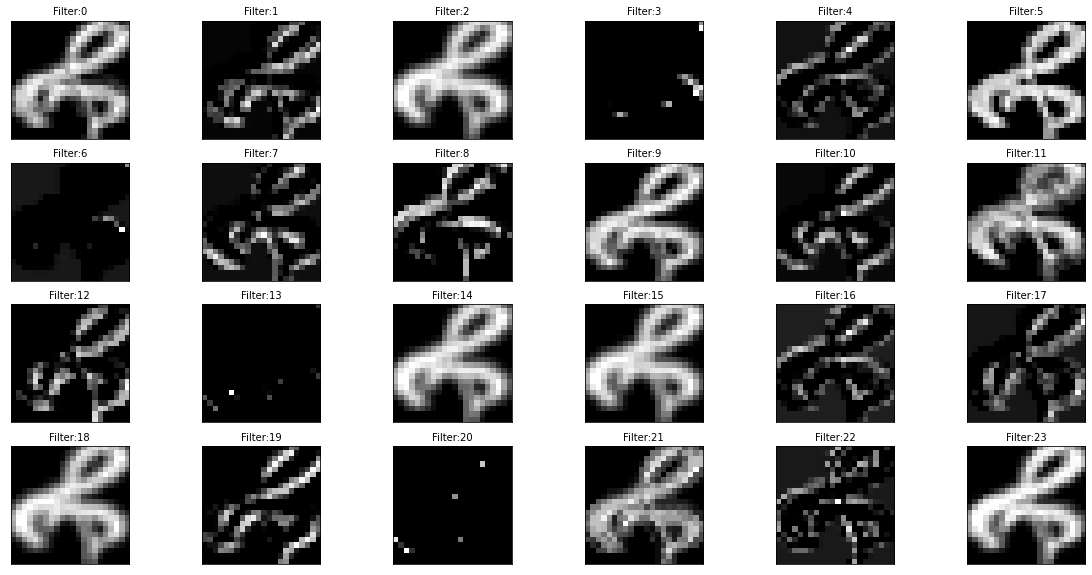

In [79]:
# Grafica una imagen por canal
_, h, w, feature_n = feature_map11071.shape

rows = 4
cols = 6 

fig, axs = plt.subplots(rows,cols,figsize=(20,10))
for i in range(rows):
    for j in range(cols):
        index = (i*cols)+j
        axs[i,j].set_title("Filter:{0}".format(index), c='black',fontsize=10)
        axs[i,j].imshow(feature_map11071[0,:,:,index], cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
plt.show()

#### Análisis del feature map
En esta capa principalmente se enfoca en los trazos de la clave en su totalidad.

## Visualizando la segunda capa convolucional
La segunda capa corresponde a la capa 3 (por pooling y dropout), que contiene una imagen 9*9 porque se pierden pixeles por el filtro.

In [80]:
layer_index = 3
model_l1 = Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[layer_index].output)
feature_map_l1 = model_l1.predict(img.reshape(1, 24,24, 1))
print(feature_map_l1.shape)

(1, 9, 9, 48)


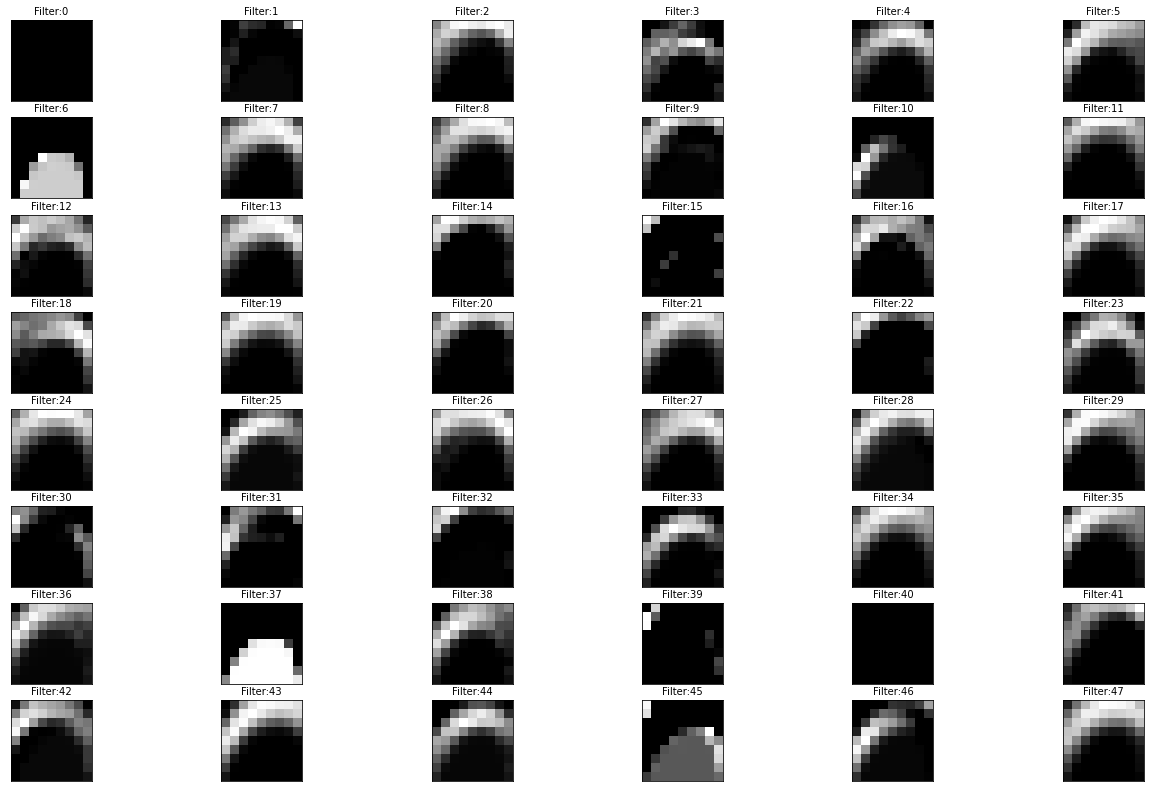

In [81]:
_, h, w, feature_n = feature_map_l1.shape

rows = 8
cols = 6 
fig, axs = plt.subplots(rows,cols,figsize=(22,14))
for i in range(rows):
    for j in range(cols):
        index = (i*cols)+j
        axs[i,j].set_title("Filter:{0}".format(index), c='black',fontsize=10)
        axs[i,j].imshow(feature_map_l1[0,:,:,index], cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
plt.show()

#### Análisis
Como se puede apreciar aquí aprende principalmente el trazo central curvo de la prolongación. Busca el agujero que queda al acercar la imagen.

In [82]:
layer_index = 3
model_l1 = Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[layer_index].output)
feature_map_l1_212 = model_l1.predict(img212.reshape(1, 24,24, 1))
print(feature_map_l1_212.shape)

(1, 9, 9, 48)


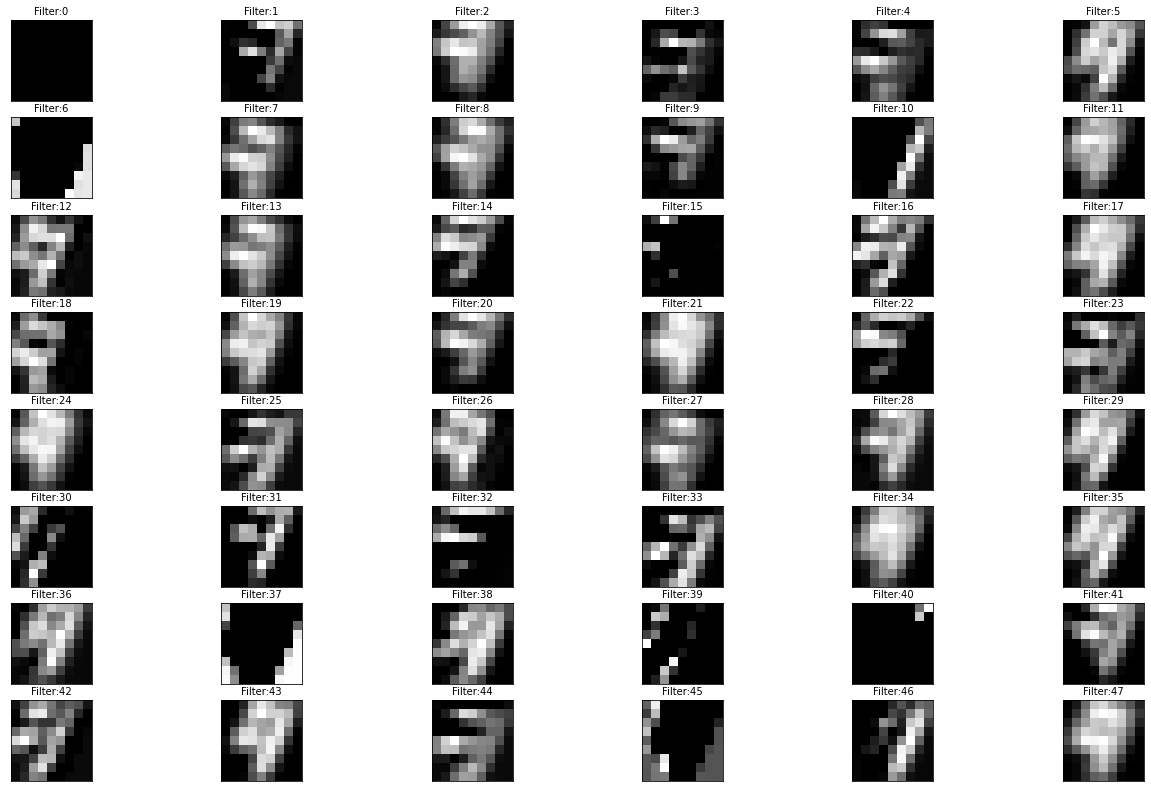

In [83]:
_, h, w, feature_n = feature_map_l1_212.shape

rows = 8
cols = 6 
fig, axs = plt.subplots(rows,cols,figsize=(22,14))
for i in range(rows):
    for j in range(cols):
        index = (i*cols)+j
        axs[i,j].set_title("Filter:{0}".format(index), c='black',fontsize=10)
        axs[i,j].imshow(feature_map_l1_212[0,:,:,index], cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
plt.show()

#### Análisis
Aquí parece buscar lo que es una F invertida. Pixelea en demasía la imagen.

In [84]:
layer_index = 3
model_l1_11071 = Model(inputs=cnn_model.inputs, outputs=cnn_model.layers[layer_index].output)
feature_map_l1_11071 = model_l1_11071.predict(img11071.reshape(1, 24,24, 1))
print(feature_map_l1_11071.shape)

(1, 9, 9, 48)


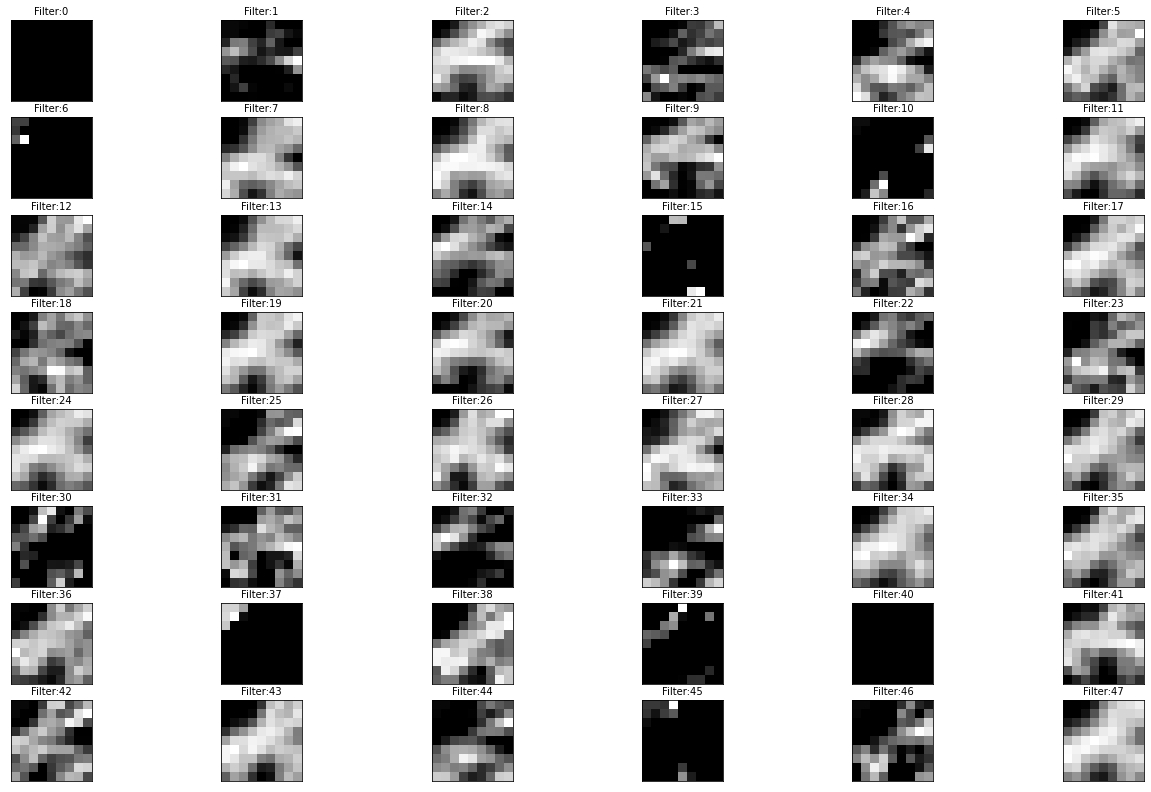

In [85]:
_, h, w, feature_n = feature_map_l1_11071.shape

rows = 8
cols = 6 
fig, axs = plt.subplots(rows,cols,figsize=(22,14))
for i in range(rows):
    for j in range(cols):
        index = (i*cols)+j
        axs[i,j].set_title("Filter:{0}".format(index), c='black',fontsize=10)
        axs[i,j].imshow(feature_map_l1_11071[0,:,:,index], cmap='gray')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
plt.show()

#### Análisis
Sin duda este es uno de los más difíciles de explicar, pareciera que enfoca únicamente el centro de la clave buscando el final achirulado del centro. Los filtros 4, 18, 23 y 44 parecen buscar el pliegue de la cabeza. Los 10, 15 y 37 buscan los espacios vacíos invirtiendo los colores de la imagen.

# Conclusiones y recomendaciones

* Probar a entrenar la red con más símbolos, parece que los datos son bastante buenos para entrenar una diversidad de símbolos.
* Usar otras estrategias de DeepLearning para ver su diferencia.
* Conseguir datasets con imágenes a color para ver como se sensibiliza el modelo a los colores, en el caso algunas notaciones el color de la nota identifica su duración y expresión.

#### Recomendación 1
Vamos a entrenar la red con más símbolos a ver cómo se desenvuelve.

In [47]:
filtro2 = frame.Clase.value_counts().index.tolist()
filtro2.remove('6-8-Time')
filtro2.remove('5-8-Time')
filtro2.remove('8-8-Time')
datos2 = frame[frame['Clase'].isin(filtro2)]
datos2.head(10)

,0,1,2,3,4,5,6,7,8,9,...,567,568,569,570,571,572,573,574,575,Clase
440,7.75,49.00,46.75,44.25,0.00,0.00,1.0,1.50,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accent
441,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,5.50,11.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accent
442,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1.00,65.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accent
443,0.50,0.50,44.75,255.00,167.75,31.00,14.0,0.50,0.50,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accent
444,0.50,0.00,108.75,255.00,254.50,77.25,61.0,42.75,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accent
445,0.00,0.50,4.75,40.50,234.25,225.50,53.5,19.50,0.00,1.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accent
446,128.25,255.00,113.25,77.00,0.00,0.50,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accent
447,0.00,0.00,0.00,0.00,0.00,0.00,0.0,1.75,22.50,215.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accent
448,4.25,46.25,236.00,254.75,255.00,88.00,49.0,8.75,0.00,3.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accent
449,0.00,1.50,1.25,61.50,242.75,39.00,0.0,1.50,2.25,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Accent


In [48]:
datos2 = datos2.to_numpy()
datos2

array([[7.75, 49.0, 46.75, ..., 0.0, 0.0, 'Accent'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Accent'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Accent'],
       ...,
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Whole-Half-Rest'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Whole-Half-Rest'],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 'Whole-Half-Rest']], dtype=object)

In [49]:
# Convirtiendo los datos a float
datos2[::, 0::575] = datos2[::,0::575].astype(float)
# Label encoder para las categorías
le2 = preprocessing.LabelEncoder()
le2.fit(datos2[::,576])
le2.classes_

array(['Accent', 'Barline', 'Brace', 'Breve', 'Chord', 'Coda-Square',
       'Cut-Time', 'Dotted-Horizontal-Spanner', 'Double-Sharp',
       'Eighth-Grace-Note', 'Eighth-Rest', 'Fermata', 'G-Clef',
       'Hairpin-Crescendo', 'Half-Note', 'Marcato',
       'Multiple-Eighth-Notes', 'Multiple-Quarter-Notes', 'Natural',
       'Onehundred-Twenty-Eight-Rest', 'Quarter-Note', 'Sharp',
       'Sixteenth-Rest', 'Sixty-Four-Rest', 'Stopped', 'Thirty-Two-Note',
       'Tie-Slur', 'Trill-Wobble', 'Turn', 'Whole-Half-Rest'],
      dtype=object)

In [50]:
# Transformando los datos a forma numérica
datos2[::,576] = le2.transform(datos2[::,576])
# Convirtiendo los datos a flotante
datos2.astype(float)
# Haciendo el splitting entre training set y test set
train2, test2 = train_test_split(datos2, test_size=0.30) # Usé la librería de sklearn para hacerlo de manera más simple

# Segmentando el dataset en X y Y
x_train2 = train2[::,:576].astype(float)
y_train2 = train2[::, 576].astype(float)
x_test2 = train2[::,:576].astype(float)
y_test2 = train2[::, 576].astype(float)

# Re-escalando las imágenes
x_train2 = x_train2 / 255
x_test2 = x_test2 / 255

# Preparándolo con tamaño (24, 24, 1)
x_train2 = x_train2.reshape(x_train2.shape[0], 24, 24, 1)

In [51]:
# Número de clases
len(le2.classes_)

30

### Modelo nuevo

In [52]:
cnn_model2 = Sequential(name='Simple CNN')
#convlolutional layers
cnn_model2.add(Conv2D(24, kernel_size=(3, 3), activation='relu', input_shape=(24, 24, 1)))
cnn_model2.add(MaxPooling2D(pool_size=(2,2)))
cnn_model2.add(Dropout(0.25))

cnn_model2.add(Conv2D(48, kernel_size=(3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D(pool_size=(2,2)))

cnn_model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model2.add(MaxPooling2D(pool_size=(2,2)))

# dense layers
cnn_model2.add(Flatten())
cnn_model2.add(Dense(1024, activation='relu'))
cnn_model2.add(Dense(512, activation='relu'))
cnn_model2.add(Dense(30, activation='softmax'))

# Compile the model
cnn_model2.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print(cnn_model2.summary())

historial_del_modelo = cnn_model2.fit(x_train2, y_train2,
                          batch_size = 128,
                          epochs = 60,
                          validation_split = 0.2,
                          shuffle=True, verbose=1)

Model: "Simple CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 22, 22, 24)        240       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 24)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 24)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 48)          10416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 48)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 64)          27712     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0

In [53]:
# Preparándolo con tamaño (24, 24, 1)
x_test2 = x_test2.reshape(x_test2.shape[0], 24, 24, 1)

In [54]:
test_loss2, test_acc2 = cnn_model2.evaluate(x_test2, y_test2)

print('\nTest accuracy:', test_acc2)
print('Test loss:    ', test_loss2)

27662/27662 [==============================] - 7s 245us/step

Test accuracy: 0.947689950466156
Test loss:     0.1640387707201418


### Observaciones importantes
* Las imágenes fueron reestructuradas de 96*96 a 24*24 por motivos de limitaciones de memoria. Sería interesante usar las imágenes con una resolución mayor.

<center><img src="https://s-media-cache-ak0.pinimg.com/736x/b0/43/61/b043610d0e33db1d2278acf2318149b3.jpg" alt="drawing" width="100"/>